In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import scipy
import aifc
import csv


#data = np.loadtxt('TEST.csv', delimiter=',')
#clip_name = data[:,0]
#label = data[:,1]

#plt.scatter(clip_name,label)                          # afficher le nuage de point
#plt.show()

In [3]:
import pandas as pd

df = pd.read_csv('TEST.csv', header=None, sep=',')
df.columns=['sample', 'label']

df.head()

,sample,label
0,train1.aiff,0
1,train2.aiff,0
2,train3.aiff,0
3,train4.aiff,0
4,train5.aiff,0


0    train1.aiff
1    train2.aiff
2    train3.aiff
3    train4.aiff
4    train5.aiff
5    train6.aiff
6    train7.aiff
7    train8.aiff
8    train9.aiff
Name: sample, dtype: object
[[ 0.95175     0.1297666   0.1291571  ...,  0.1333481   0.1291571
   0.1297666 ]
 [ 1.0685      0.00753399  0.02628447 ...,  0.02307569  0.02628447
   0.00753399]
 [ 1.063       0.01633398  0.01855627 ...,  0.02441795  0.01855627
   0.01633398]
 ..., 
 [ 1.21625     0.11070727  0.09229194 ...,  0.10910445  0.09229194
   0.11070727]
 [ 1.126       0.03220637  0.05445704 ...,  0.02814831  0.05445704
   0.03220637]
 [ 1.099       0.02095707  0.03893757 ...,  0.03190175  0.03893757
   0.02095707]]
[0 0 0 0 0 1 1 0 1]


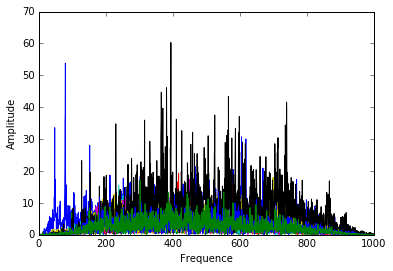

In [5]:
X = df['sample']
Y = df['label']
print X

#b = [np.atleast_1d(np.asarray(x,dtype=np.int64)) for x in Y ]
#c = csv.writer(open("DONNEES.csv", "wb"))
#c.writerow(["Sample","Label"])
#c.writerow([9.80, 'Tarte aux pommes'])
#c.append (X[0],Y[0])
a = np.array([], float)
liste_sample_fft = list()
liste_label = list()


for i in range(9) :
    #filename = X[i] 
    s = aifc.open("C:\\Users\\Orianne\\Documents\\Cours\\Projet_Baleine_2\\whale_data\\data\\train\\" + X[i], "r")
    N = s.getnframes()
    strsig = s.readframes(N)
    y = np.fromstring(strsig, np.short).byteswap()
    FE = s.getframerate()
    A = np.fft.fft(y)

    DeltaT = 1./FE
    ampl = np.abs(A)*1./N
    freqs = np.fft.fftfreq(N, DeltaT)
    
    plt.plot(freqs[:N/2], ampl[:N/2])
    plt.ylabel("Amplitude")
    plt.xlabel("Frequence")
    #plt.show()
    #print ampl
    #print X[i]
    liste_sample_fft.append(ampl)
    liste_label.append(Y[i])
       
        
#for i in range(10):
#    c.append (X[i],Y[i])

liste_sample_fft = np.array(liste_sample_fft)
liste_label = np.array(liste_label)

print liste_sample_fft
print liste_label
    
    

In [6]:
from sklearn.ensemble import RandomForestClassifier

B = RandomForestClassifier()
B.fit(liste_sample_fft, liste_label)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
B.predict(liste_sample_fft[24])

C:\Users\Orianne\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=int64)

In [27]:
liste_label[7]

0

[ 0.91725     0.17900491  0.17839326 ...,  0.17663856  0.17839326
  0.17900491]


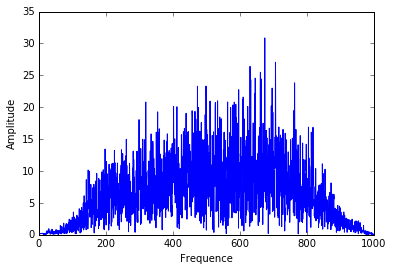

In [105]:
Z = "train180.aiff"
s = aifc.open("C:\\Users\\Orianne\\Documents\\Cours\\Projet_Baleine_2\\whale_data\\data\\train\\" + Z, "r")
N = s.getnframes()
strsig = s.readframes(N)
y = np.fromstring(strsig, np.short).byteswap()
FE = s.getframerate()
F = np.fft.fft(y)

DeltaT = 1./FE
ampl = np.abs(F)*1./N
freqs = np.fft.fftfreq(N, DeltaT)
    
plt.plot(freqs[:N/2], ampl[:N/2])
plt.ylabel("Amplitude")
plt.xlabel("Frequence")
    #plt.show()
    #print ampl
    #print X[i]

print (ampl)
    

In [106]:
B.predict(ampl)

C:\Users\Orianne\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int64)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
LS = liste_sample_fft
LS_fit = pca.fit_transform(LS)

In [23]:
print LS.shape[1]
print LS_fit.shape[1]
print LS
print LS_fit

4000
4
[[ 0.95175     0.1297666   0.1291571  ...,  0.1333481   0.1291571
   0.1297666 ]
 [ 1.0685      0.00753399  0.02628447 ...,  0.02307569  0.02628447
   0.00753399]
 [ 1.063       0.01633398  0.01855627 ...,  0.02441795  0.01855627
   0.01633398]
 ..., 
 [ 1.21625     0.11070727  0.09229194 ...,  0.10910445  0.09229194
   0.11070727]
 [ 1.126       0.03220637  0.05445704 ...,  0.02814831  0.05445704
   0.03220637]
 [ 1.099       0.02095707  0.03893757 ...,  0.03190175  0.03893757
   0.02095707]]
[[ -30.01892271 -237.6097066    -8.70524238    3.44063848]
 [ 107.90985988   38.30922302  -30.64185672   28.8819541 ]
 [  85.09147775   30.19825208  -31.8588869    16.15172482]
 [  76.44340266   23.10625883   -9.87892326   -3.49852446]
 [  27.47131891   23.51800267    4.78926999 -124.74094411]
 [  23.65540548   15.37126885  129.67405935   23.05044708]
 [-428.99627454   48.23894224  -14.01850306   10.40104502]
 [  71.03338339   31.37727205  -13.34381991   27.93841675]
 [  67.41034918   27.4

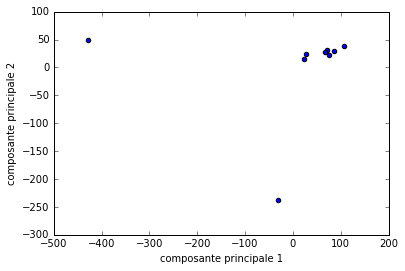

In [24]:
plt.scatter(LS_fit[:,0], LS_fit[:,1])
plt.xlabel("composante principale 1")
plt.ylabel("composante principale 2")
plt.show()

In [21]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('0', '1'),
                    ('blue', 'red')):
    plt.scatter(LS_fit[np.array(Y==lab),0],
                LS_fit[np.array(Y==lab), 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\Orianne\Anaconda2\lib\site-packages\pandas\core\ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison